In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
MODEL_ORDER = [
    "gemma:7b",
    "gemma2:27b",
    "qwen:72b",
    "qwen2:72b",
    "llama3.1:8b",
    "llama2:70b",
    "llama3:70b",
    "llama3.1:70b",
    "mistral:7b",
    "mixtral:8x7b",
    "mixtral:8x22b",
    "phi3:14b",
]
PERSONA_ORDER = ["base", "liberal", "moderate", "conservative"]

In [10]:
dataset: pd.DataFrame = pd.read_parquet("./data/dataset.parquet")
dataset

response dimension
segment   id model      persona                     
agreement 1  gemma2:27b base           4.0      harm
                        base           4.0      harm
                        base           4.0      harm
                        base           4.0      harm
                        base           4.0      harm
...                                    ...       ...
relevance 16 qwen:72b   moderate       5.0    purity
                        moderate       5.0    purity
                        moderate       0.0    purity
                        moderate       0.0    purity
                        moderate       5.0    purity

[76412 rows x 2 columns]

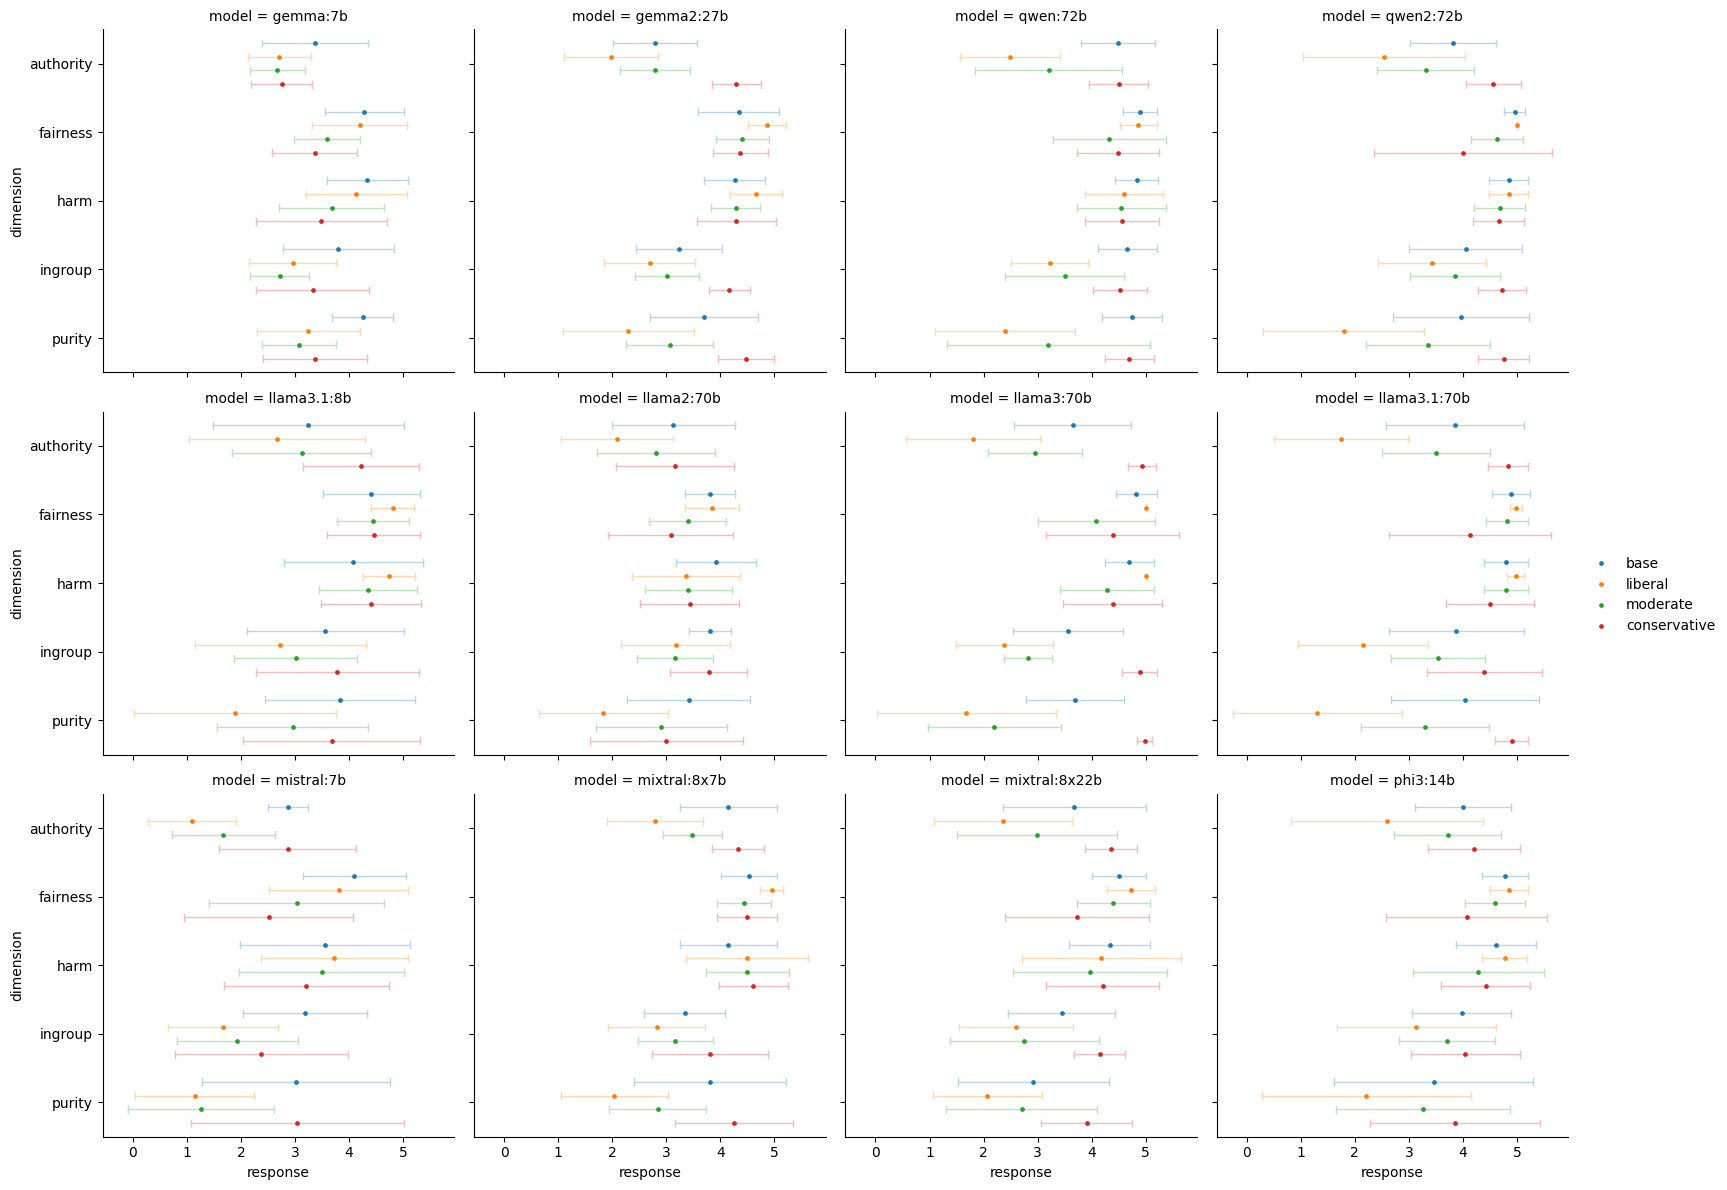

In [251]:
grid = sns.FacetGrid(
    (
        dataset[dataset["dimension"] != "catch"]
        .pipe(
            lambda _df: _df.assign(
                dimension=_df["dimension"].cat.remove_unused_categories()
            )
        )
        .reset_index()
    ),
    col="model",
    col_wrap=4,
    col_order=MODEL_ORDER,
    height=4,
)

grid.map_dataframe(
    sns.pointplot,
    errorbar="sd",
    x="response",
    y="dimension",
    linestyle="none",
    hue="persona",
    hue_order=PERSONA_ORDER,
    palette=sns.color_palette()[:4],
    dodge=(0.8 - 0.8 / 4),
    capsize=0.1,
    markersize=1.4,
    err_kws={"linewidth": 1, "alpha": 0.3},
)
grid.add_legend()
grid.savefig("./report/points.by.model_persona_dimension.pdf")

In [261]:
cross_evaluation: pd.DataFrame = pd.read_parquet(
    "./data/dataset.cross_evaluation.parquet"
).reindex(MODEL_ORDER, level=0)
cross_evaluation

sample                     anonymous                               us  \
group                        liberal  moderate conservative   liberal   
model         persona                                                   
gemma:7b      base          0.936181  0.657966     0.653966  1.507966   
              liberal       0.456446  0.152855     0.377554  0.948778   
              moderate      0.579075  0.235089     0.280779  0.710696   
              conservative  0.858599  0.368599     0.177376  0.958599   
gemma2:27b    base          0.567333  0.318667     0.434667  1.162000   
              liberal       0.285333  0.679333     1.003333  0.796000   
              moderate      0.409333  0.162000     0.458000  1.009333   
              conservative  1.220000  0.970000     0.966000  1.820000   
qwen:72b      base          1.621333  1.371333     1.367333  2.221333   
              liberal       0.412034  0.528701     0.804701  1.012034   
              moderate      0.665785  0.405119     0.480851  1.255119   
              conservative  1.456004  1.206004     1.202004  2.056004   
qwen2:72b     base          1.226667  0.976667     0.972667  1.826667   
              liberal       0.582667  0.759333     1.035333  1.020000   
              moderate      0.863333  0.613333     0.630667  1.463333   
              conservative  1.581333  1.192667     1.188667  2.042667   
llama3.1:8b   base          0.795333  0.477333     0.473333  1.327333   
              liberal       0.389333  0.622000     0.946000  0.864000   
              moderate      0.475333  0.244000     0.444000  1.075333   
              conservative  1.008000  0.758000     0.754000  1.608000   
llama2:70b    base          0.863333  0.353333     0.261333  1.115333   
              liberal       0.507333  0.557333     0.590667  0.452667   
              moderate      0.754000  0.280000     0.232000  0.854000   
              conservative  1.027450  0.517450     0.353450  1.127450   
llama3:70b    base          0.984000  0.734000     0.730000  1.584000   
              liberal       0.488000  0.998000     1.322000  0.713333   
              moderate      0.276000  0.310000     0.574000  0.769333   
              conservative  1.614667  1.364667     1.360667  2.214667   
llama3.1:70b  base          1.192000  0.942000     0.938000  1.792000   
              liberal       0.610667  1.120667     1.444667  0.596000   
              moderate      0.892000  0.642000     0.676667  1.492000   
              conservative  1.540000  1.202000     1.198000  2.052000   
mistral:7b    base          0.621301  0.171301     0.236699  0.861301   
              liberal       0.813521  1.063521     1.220488  0.286488   
              moderate      0.823268  1.073268     1.077268  0.248458   
              conservative  0.900562  0.590562     0.553727  0.951246   
mixtral:8x7b  base          0.933228  0.642487     0.638487  1.492487   
              liberal       0.384382  0.528096     0.852096  0.920382   
              moderate      0.582667  0.398000     0.554000  1.182667   
              conservative  1.199324  0.949324     0.945324  1.799324   
mixtral:8x22b base          0.677781  0.461114     0.617114  1.277781   
              liberal       0.170000  0.544000     0.868000  0.687333   
              moderate      0.378667  0.243333     0.475333  0.864000   
              conservative  1.237333  0.808667     0.714000  1.578667   
phi3:14b      base          1.066002  0.816002     0.812002  1.666002   
              liberal       0.414667  0.559333     0.835333  1.014667   
              moderate      0.812000  0.562000     0.614000  1.412000   
              conservative  1.131862  0.768618     0.764618  1.618618   

sample                                               korean            \
group                       moderate conservative   liberal  moderate   
model         persona                                                   
gemma:7b      base          1.137966     0.838471  1.2479

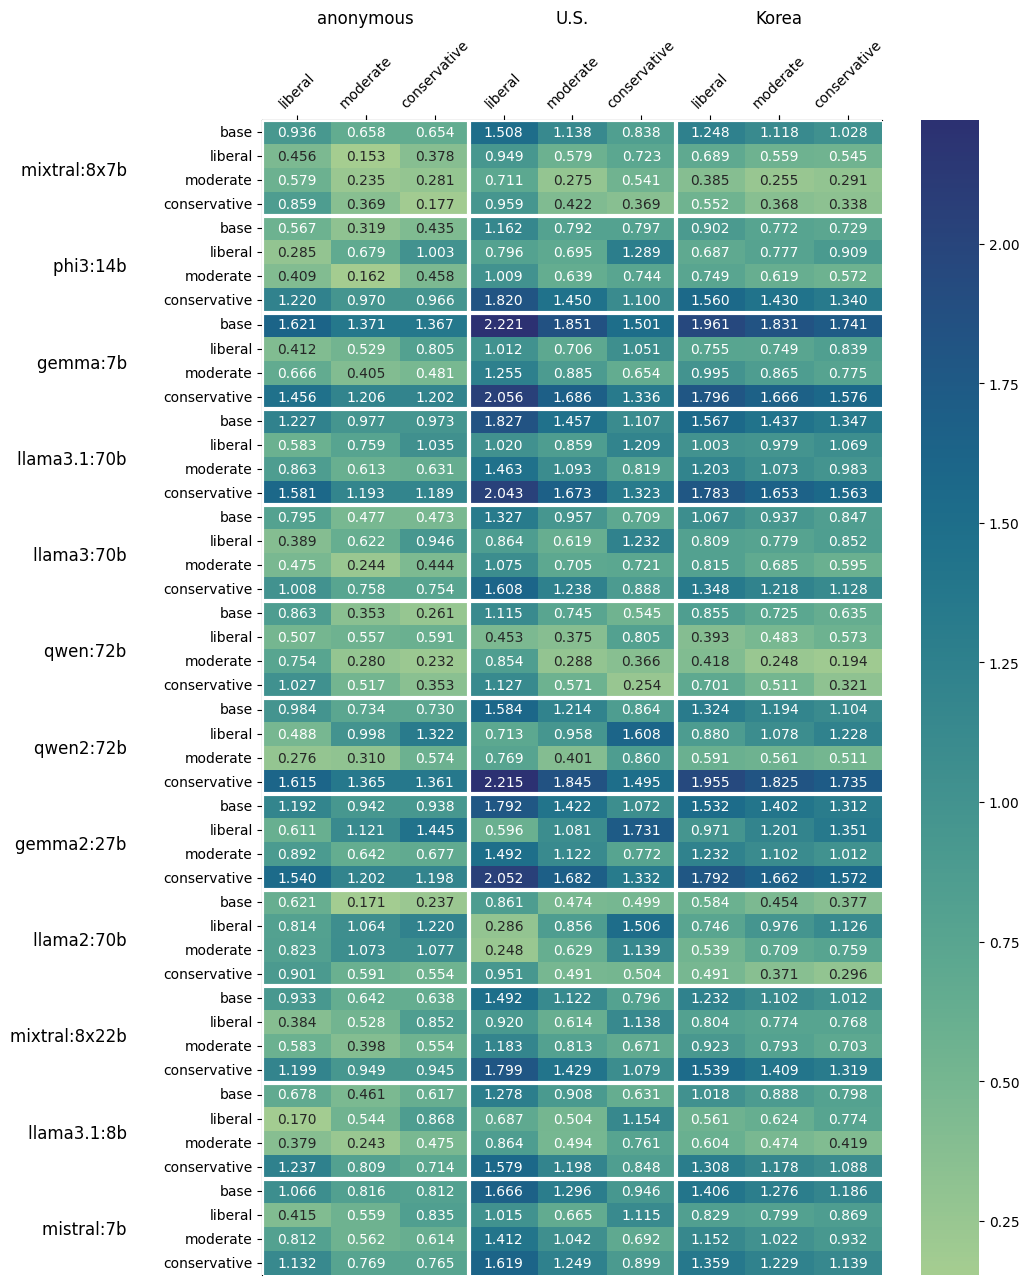

In [263]:
fig, ax = plt.subplots(figsize=(10, 15))

sns.heatmap(cross_evaluation, annot=True, fmt=".3f", cmap="crest")

ax.hlines(
    range(0, len(cross_evaluation), 4), *ax.get_xlim(), linewidth=3.0, color="white"
)
ax.vlines(
    range(0, len(cross_evaluation.columns), 3),
    *ax.get_ylim(),
    linewidth=3.0,
    color="white",
)

secx = ax.secondary_xaxis(location="top")
secx.set_xticks(
    [1.5, 4.5, 7.5], labels=["anonymous\n\n\n\n", "U.S.\n\n\n\n", "Korea\n\n\n\n"]
)
secx.tick_params(axis="x", labelsize="large")

ax.set(xlabel="", ylabel="")

ax.xaxis.tick_top()
ax.set_xticklabels(["liberal", "moderate", "conservative"] * 3)
ax.tick_params(axis="x", labelrotation=45)

ax.set_yticklabels(list(cross_evaluation.index.get_level_values(1)))

secy = ax.secondary_yaxis(location="left")
secy.set_yticks(
    range(2, 49, 4),
    labels=[
        f"{label}{" " * 24}"
        for label in set(list(cross_evaluation.index.get_level_values(0)))
    ],
)
secy.tick_params(axis="y", color="white", labelsize="large")

fig.savefig("./report/heat.cross_evaluation.pdf", bbox_inches="tight")

In [3]:
dataset_agg_question_mean = (
    pd.read_parquet("./data/dataset.agg.question.parquet")
    .filter(like="mean")
    .droplevel(axis=1, level=None)
)
dataset_agg_question_mean

model        gemma2:27b                                gemma:7b               \
persona            base conservative liberal moderate      base conservative   
segment   id                                                                   
agreement 1        4.10         4.00    5.00     4.00  5.000000     1.680000   
          2        5.00         5.00    5.00     5.00  5.000000     3.240000   
          3        3.08         5.00    3.02     3.06  5.000000     4.900000   
          4        4.00         4.94    2.00     3.00  4.960000     3.340000   
          5        5.00         4.96    4.00     4.00  4.880000     5.000000   
          6        5.00         5.00    5.00     5.00  5.000000     5.000000   
          7        5.00         5.00    5.00     5.00  5.000000     5.000000   
          8        4.58         4.00    5.00     4.00  5.000000     2.740000   
          9        4.00         4.00    2.00     3.00  4.660000     2.380000   
          10       2.00         4.00    1.00     2.00  2.000000     2.000000   
          11       2.00         4.00    0.96     1.60  3.600000     2.140000   
          12       4.82         5.00    4.34     4.00  5.000000     5.000000   
          13       4.00         3.92    5.00     4.00  4.560000     4.260000   
          14       1.82         4.00    1.34     2.00  2.040000     2.080000   
          15       1.70         4.82    1.00     2.00  3.340000     2.280000   
          16       3.88         5.00    2.00     3.00  5.000000     3.940000   
relevance 1        3.64         3.00    4.00     4.00  3.000000     3.000000   
          2        3.00         4.00    4.14     4.00  3.020000     3.000000   
          3        3.16         4.00    3.00     3.00  4.020408     3.938776   
          4        3.00         4.00    2.74     3.00  3.560000     2.979167   
          5        4.00         4.00    2.14     3.00  4.020000     3.000000   
          6        0.00         0.00    0.00     0.00  2.918367     1.000000   
          7        4.00         4.00    4.60     4.00  3.980000     3.208333   
          8        4.48         4.30    5.00     4.42  4.063830     2.979167   
          9        4.00         4.00    3.80     4.00  4.020000     3.612245   
          10       3.00         4.00    1.90     3.00  3.000000     2.980000   
          11       2.96         3.92    3.68     3.76  4.000000     3.065217   
          12       4.06         4.78    5.00     4.68  4.000000     3.000000   
          13       4.96         5.00    5.00     5.00  4.020000     3.959184   
          14       3.32         4.00    3.00     3.00  3.041667     3.000000   
          15       3.00         4.00    3.22     3.76  3.360000     2.954545   
          16       4.30         4.96    1.00     3.00  4.000000     2.977778   

model                            llama2:70b               ... phi3:14b  \
persona        liberal  moderate       base conservative  ...  liberal   
segment   id                                              ...            
agreement 1   4.960000  3.000000       4.02     3.780000  ...     5.00   
          2   5.000000  4.380000       4.00     3.775510  ...     5.00   
          3   3.440000  3.000000       4.00     4.145833  ...     3.28   
          4   3.320000  3.080000       4.00     4.000000  ...     4.22   
          5   5.000000  4.220000       3.40     3.400000  ...     4.06   
          6   5.000000  5.000000       5.00     4.081633  ...     5.00   
          7   5.000000  5.000000       4.14     3.877551  ...     5.00   
          8   4.920000  3.160000       4.00     3.530612  ...     5.00   
          9   2.000000  2.140000       4.00     4.000000  ...     2.74   
          10  2.000000  2.000000       1.18     1.000000  ...     0.42   
          11  2.000000  2.140000       1.78     1.720000  ...     0.18   
          12  5.000000  5.000000       4.86     4.163265  ...     4.98   
          13  5.000000  3.980000       3.82     1.125000  ...     4.96   
          14  2

In [4]:
dataset_agg_question_var = (
    pd.read_parquet("./data/dataset.agg.question.parquet")
    .filter(like="var")
    .droplevel(axis=1, level=None)
)
dataset_agg_question_var

model        gemma2:27b                                   gemma:7b  \
persona            base conservative   liberal  moderate      base   
segment   id                                                         
agreement 1    0.091837     0.000000  0.000000  0.000000  0.000000   
          2    0.000000     0.000000  0.000000  0.000000  0.000000   
          3    0.075102     0.000000  0.020000  0.057551  0.000000   
          4    0.000000     0.057551  0.000000  0.000000  0.039184   
          5    0.000000     0.039184  0.000000  0.000000  0.107755   
          6    0.000000     0.000000  0.000000  0.000000  0.000000   
          7    0.000000     0.000000  0.000000  0.000000  0.000000   
          8    0.248571     0.000000  0.000000  0.000000  0.000000   
          9    0.000000     0.000000  0.000000  0.000000  0.228980   
          10   0.000000     0.000000  0.000000  0.000000  0.000000   
          11   0.000000     0.000000  0.039184  0.244898  0.244898   
          12   0.150612     0.000000  0.228980  0.000000  0.000000   
          13   0.000000     0.075102  0.000000  0.000000  0.251429   
          14   0.150612     0.000000  0.228980  0.000000  0.039184   
          15   0.214286     0.150612  0.000000  0.000000  0.637143   
          16   0.107755     0.000000  0.000000  0.000000  0.000000   
relevance 1    0.235102     0.000000  0.000000  0.000000  0.000000   
          2    0.000000     0.000000  0.122857  0.000000  0.020000   
          3    0.137143     0.000000  0.000000  0.000000  0.020408   
          4    0.000000     0.000000  0.196327  0.000000  0.251429   
          5    0.000000     0.000000  0.122857  0.000000  0.020000   
          6    0.000000     0.000000  0.000000  0.000000  0.076531   
          7    0.000000     0.000000  0.244898  0.000000  0.020000   
          8    0.254694     0.214286  0.000000  0.248571  0.061055   
          9    0.000000     0.000000  0.163265  0.000000  0.020000   
          10   0.000000     0.000000  0.091837  0.000000  0.000000   
          11   0.039184     0.075102  0.222041  0.186122  0.000000   
          12   0.057551     0.175102  0.000000  0.222041  0.000000   
          13   0.039184     0.000000  0.000000  0.000000  0.020000   
          14   0.222041     0.000000  0.000000  0.000000  0.040780   
          15   0.000000     0.000000  0.175102  0.186122  0.235102   
          16   0.214286     0.039184  0.000000  0.000000  0.000000   

model                                         llama2:70b               ...  \
persona      conservative   liberal  moderate       base conservative  ...   
segment   id                                                           ...   
agreement 1      0.222041  0.039184  0.244898   0.020000     0.215918  ...   
          2      1.206531  0.000000  0.240408   0.000000     0.427721  ...   
          3      0.091837  0.292245  0.000000   0.000000     0.127216  ...   
          4      0.351429  0.344490  0.075102   0.000000     0.000000  ...   
          5      0.000000  0.000000  0.175102   1.469388     1.469388  ...   
          6      0.000000  0.000000  0.000000   0.000000     0.076531  ...   
          7      0.000000  0.000000  0.000000   0.122857     0.359694  ...   
          8      0.196327  0.075102  0.137143   0.000000     1.129252  ...   
          9      0.485306  0.000000  0.245306   0.000000     0.000000  ...   
          10     0.000000  0.000000  0.000000   0.517959     0.000000  ...   
          11     0.122857  0.000000  0.245306   1.766939     1.675102  ...   
          12     0.000000  0.000000  0.000000   0.122857     0.139456  ...   
          13     0.318776  0.000000  0.020000   0.517959     0.367021  ...   
          14     0.075102  0.039184  0.039184   0.222041     0.987245  ...   
          15     0.205714  0.000000  0.080000   1.675102     2.281224  ...   
          16     0.261633  0.289388  0.075102   0.000000     0.183673  ...   
relevance 1      0.000000  0.000000  0.000000   0.599592     0.1768

In [5]:
(
    dataset_agg_question_var.mean()
    .reset_index()
    .pivot(index="model", columns="persona")
    .T.droplevel(level=0)
    .T.pipe(lambda _df: _df.assign(MEAN=_df.mean(axis=1)))
    .T.pipe(lambda _df: _df.assign(MEAN=_df.mean(axis=1)))
    .T
    # .to_latex(
    #     buf=open(f"tab.questionnaire.var.agg.tex", "w"),
    #     label=f"tab:questionnaire:questionnaire.var.agg",
    #     escape=True,
    #     float_format="{:0.3f}".format
    # )
)

persona,base,conservative,liberal,moderate,MEAN
model,,,,,
gemma2:27b,0.069936,0.025816,0.058010,0.035791,0.047388
gemma:7b,0.072934,0.133727,0.061255,0.057369,0.081321
llama2:70b,0.309145,0.513819,0.421696,0.447079,0.422935
llama3.1:70b,0.411645,0.264209,0.232079,0.232003,0.284984
llama3.1:8b,0.857985,0.757385,0.828176,0.764987,0.802133
llama3:70b,0.115587,0.061633,0.088801,0.299554,0.141393
mistral:7b,0.259016,0.665350,0.203553,0.488868,0.404197
mixtral:8x22b,0.161990,0.133648,0.112130,0.179643,0.146853
mixtral:8x7b,0.024785,0.037156,0.047231,0.012117,0.030322
